# FCIM.M.IA - Artificial Intelligence

> **Lab 3:** Linear Regression\\
> **Performed by:** Astafi Valentina, group TI-231M \\
> **Verified by:** Mihail Gavrilita, asist. univ.

## Imports and Utils

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import Image

## Task 1 -- Import your data. Analyze it via common statistical approaches. Cleanse the data if necessary.

In [ ]:
file_path = "/Users/astafivalentina/PycharmProjects/AILabs/4.LinearRegression/apartmentComplexData.csv"

data = []

with open(file_path, 'r') as file:
    for line in file:
        split_line = line.strip().strip('"').split(',')
        data.append([float(item) for item in split_line])

column_names = ['longitude', 'latitude', 'complexAge', 'totalRooms', 'totalBedrooms',
                'complexInhabitants', 'apartmentsNr', 'otherFeature', 'medianCompexValue']

data_set = pd.DataFrame(data, columns=column_names)

print(data_set.head())

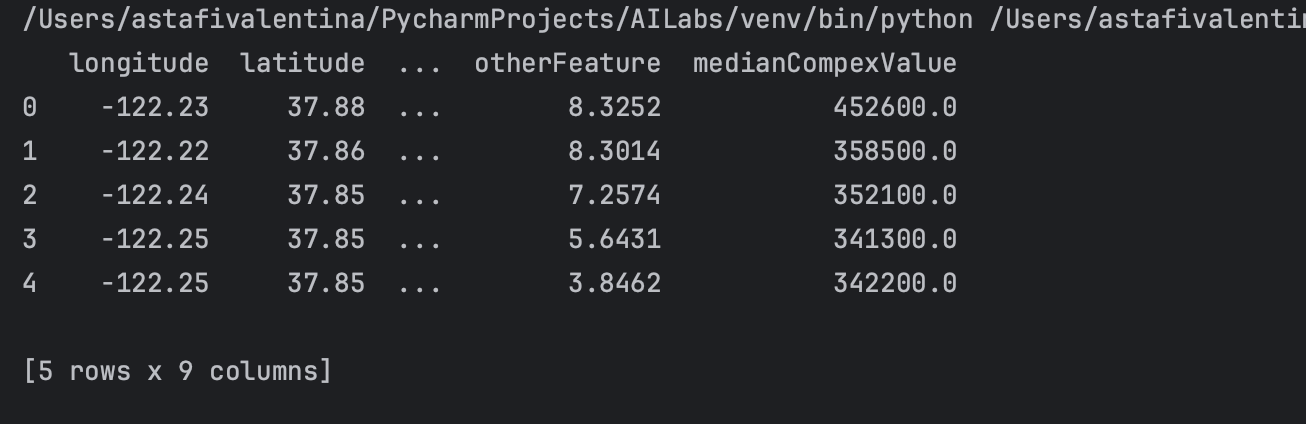

In [2]:
Image(filename="./results/1.png")

In [ ]:
interested_columns = ['complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr', 'medianCompexValue']
data_set_interest = data_set[interested_columns]

print(data_set_interest.head())

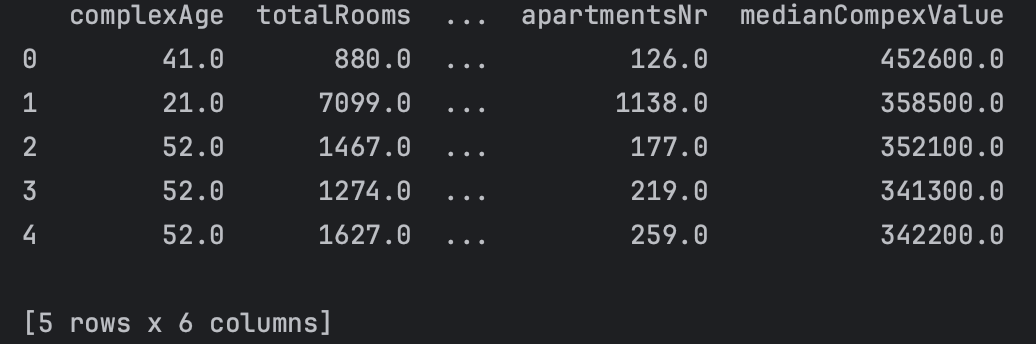

In [3]:
Image(filename="./results/2.png")

In [ ]:
# Generate descriptive statistics
descriptive_stats = data_set_interest.describe()
print(descriptive_stats)

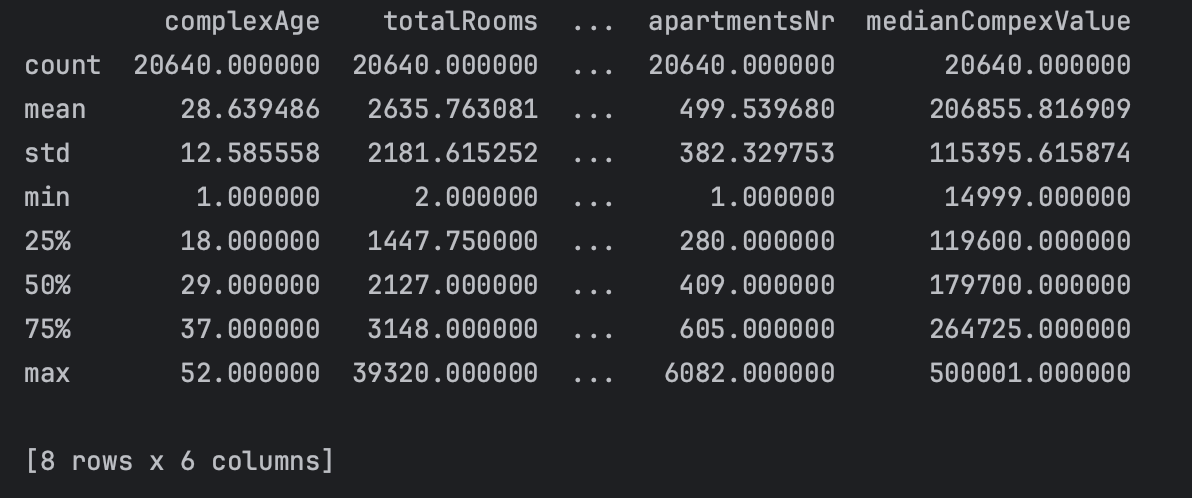

In [4]:
Image(filename="./results/3.png")

In [ ]:
# Pandas describe() is used to view some basic statistical details of a data frame
print(data_set_interest.describe())

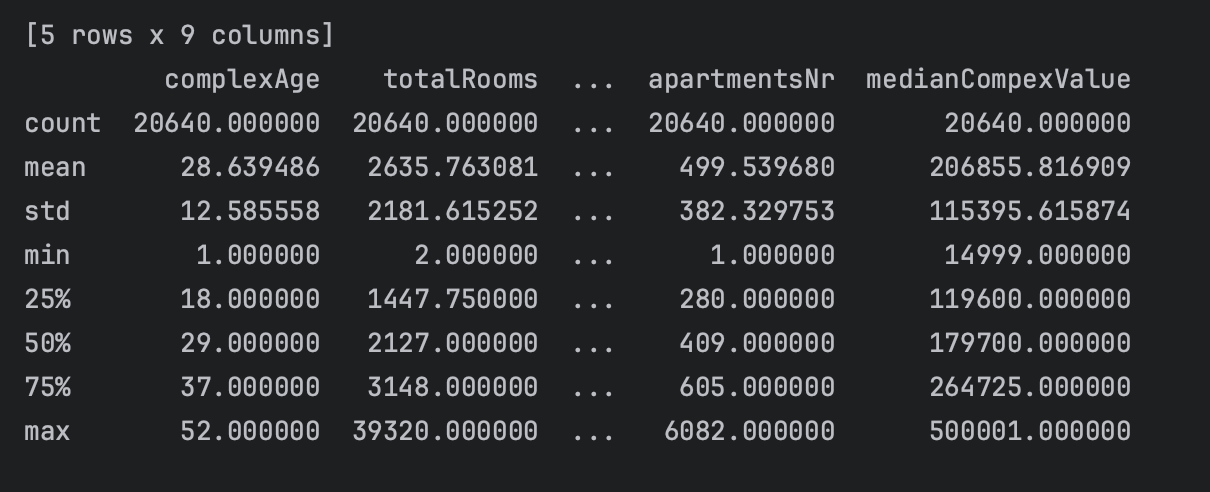

In [7]:
Image(filename="./results/4.png")

In [ ]:
# Pandas info() function is used to get a concise summary of the dataframe.
print(data_set_interest.info())

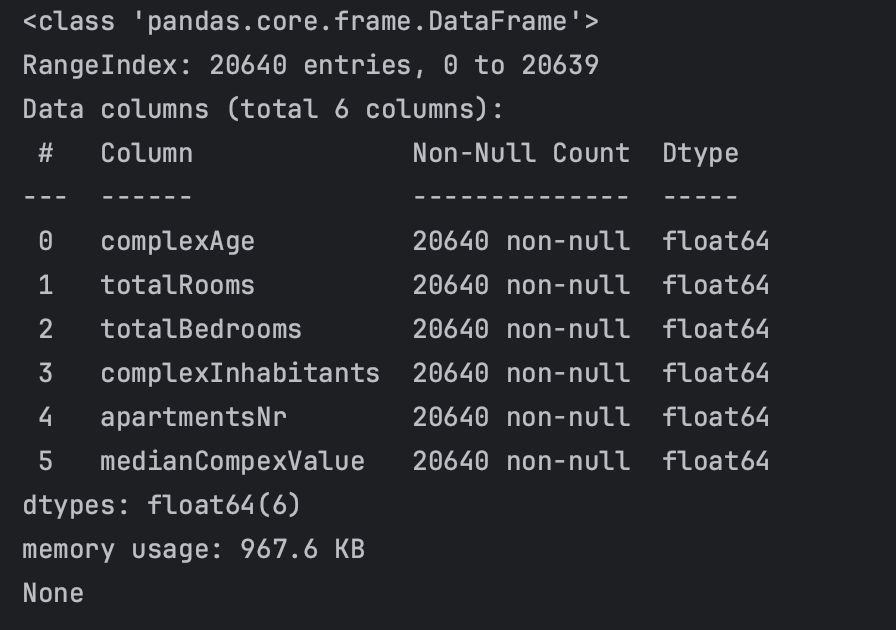

In [6]:
Image(filename="./results/5.png")

In [ ]:
# Check for missing values in the dataset
print(data_set_interest.isnull().sum())

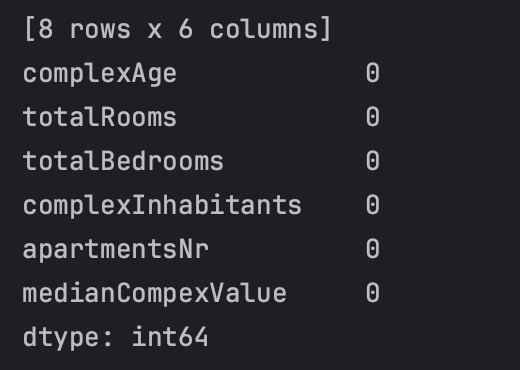

In [5]:
Image(filename="./results/6.png")

## Task 2 -- Train your model by applying linear regression.

In [ ]:
# Your work here

## Task 3 -- Show the prediction power of your model by attempting to predict the price of a new house.

## Task 4 -- Re-train your model. Use Ridge, Lasso or Elastic Net regularization.

## Task 5 -- Score and compare the scores of the models you have implemented. Interpret the result.

## Conclusions:

*Your conclusions go here*

## Bibliography:

[1] Introduction to Linear Regression. Available: https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/courses/machine_learning/deepdive2/launching_into_ml/labs/intro_linear_regression.ipynb
[2] Lasso & Ridge Regression. Available: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
[3] 
[4] 
[5] 